In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')

### Dataset Info
 - Each entry corresponds to a census **tract**, a statistical division of the area that is used by researchers to break down towns and cities. There will usually be multiple census tracts per town.
 - **LON** and **LAT** are the longitude and latitude of the center of the census tract.
 - **MEDV** is the median value of owner-occupied homes, in thousands of dollars.
 - **CRIM** is the per capita crime rate 
 - **ZN** is related to how much of the land is zoned for large residential properties.
 - **INDUS** is proportion of area used for industry.
 - **CHAS** is 1 if the census tract is next to the Charles River.
 - **NOX** is the concentration of nitrous oxides in the air.
 - **RM** is the average number of rooms per dwelling.
 - **AGE** is the proportion of owner-occupied units built before 1940.
 - **DIS** is a measure of how far the tract is from centers of employment in Boston.
 - **RAD** is a measure of closeness to important highways.
 - **TAX** is the property tax rate per $10,000 of value.
 - **PTRATIO** is the pupil-teacher ratio by town .

In [2]:
boston = pd.read_csv('../../data/boston.csv')

In [4]:
boston.info(verbose=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
TOWN       506 non-null object
TRACT      506 non-null int64
LON        506 non-null float64
LAT        506 non-null float64
MEDV       506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
dtypes: float64(11), int64(4), object(1)
memory usage: 61.3+ KB


In [5]:
boston.head()

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [6]:
boston.describe()

,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2700.355731,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,1380.036830,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,1.000000,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,1303.250000,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,3393.500000,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,3739.750000,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,5082.000000,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


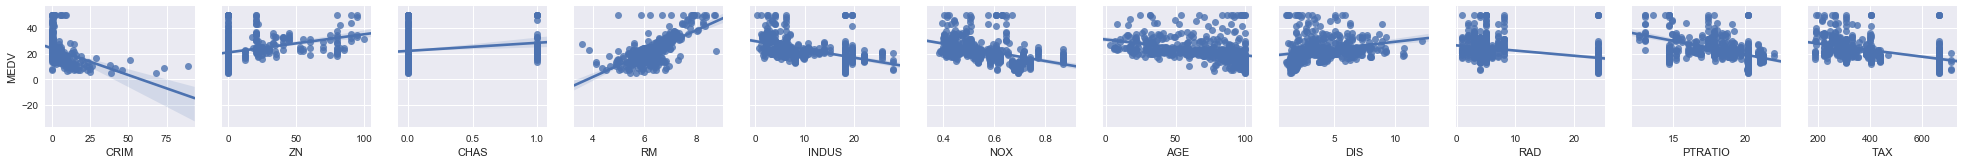

In [3]:
import seaborn as sns
# explore more features
feature_cols = ['CRIM', 'ZN', 'CHAS','RM','INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO','TAX']
# multiple scatter plots in Seaborn
sns.pairplot(boston, x_vars=feature_cols, y_vars='MEDV', kind='reg')


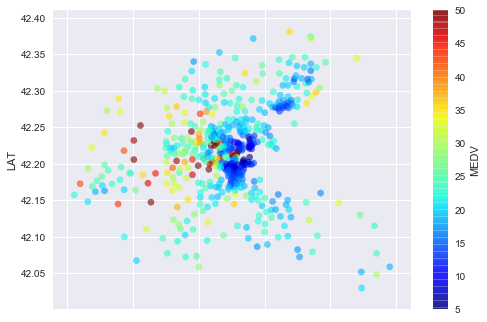

In [4]:
boston.plot.scatter(x='LON', y='LAT', c='MEDV', s=40, colormap='jet', alpha=0.6)

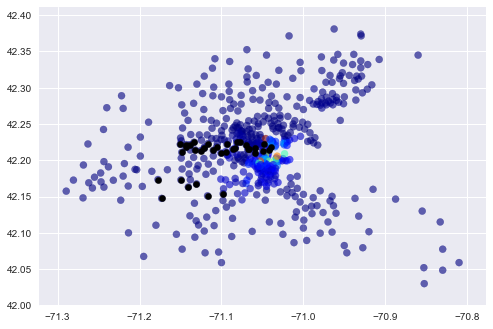

In [5]:
plt.scatter(boston.LON, boston.LAT, c=boston.CRIM, s=50, cmap='jet', alpha=0.6)
plt.scatter(boston.LON[boston.CHAS ==1], boston.LAT[boston.CHAS ==1], c='black', marker='o', s=40)

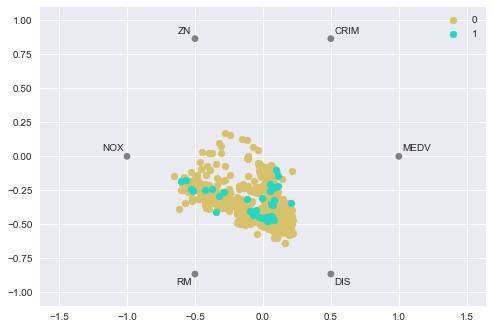

In [7]:
from pandas.plotting import radviz

radviz(boston.iloc[:,[4,5,6,8,9,10,12]], 'CHAS')

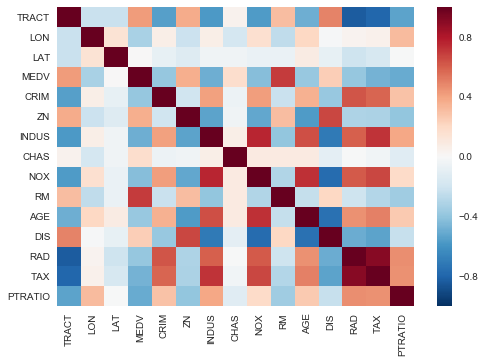

In [8]:
sns.heatmap(boston.corr())

In [14]:
# StratifiedShuffleSplit cant be used, because The least populated class in y has only 1 member, & 
# the minimum number of groups for any class cannot be less than 2.
# will use plain ShuffleSplit instead ; cross-validation must be performed post-estimation.

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in ss.split(boston):
    framTrain = boston.iloc[train_index,:]
    framTest = boston.iloc[test_index,:]


In [15]:
feature_cols = ['TRACT', 'LON', 'LAT', 'CRIM', 'ZN', 'INDUS',
       'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']

In [16]:
X = bostonTrain.loc[:,feature_cols]
y = bostonTrain.loc[:,'MEDV']

X_test = bostonTest.loc[:,feature_cols]
y_test = bostonTest.loc[:,'MEDV']

---

### Regression via Decision Trees

In [17]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor as DTR
treereg = DTR(random_state=1)

In [19]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4.7482150801165464

---

### Feature Selection

In [25]:
from sklearn.cross_validation import cross_val_score
# list of values to try
min_leaf_range = range(2,25,2)
#max_depth_range = np.linspace(0.1,1.,num=10) 
# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for leaf_no in min_leaf_range:
    treereg = DTR(min_samples_split=22, min_samples_leaf=leaf_no, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

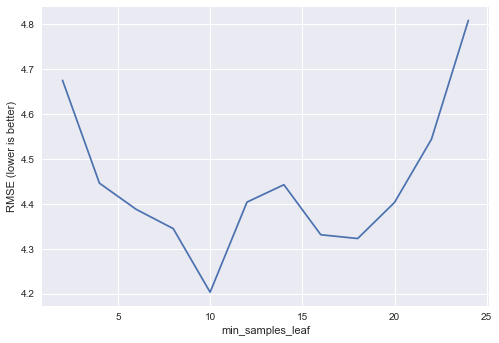

In [26]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('min_samples_leaf')
plt.ylabel('RMSE (lower is better)')

> *Iterating over 1 feature (**min_samples_leaf**) , the tree built with min. **10** samples in each leaf exhibits the lowest RMSE.*

In [28]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
treereg = DTR(min_samples_split=22, min_samples_leaf=10)
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4.2031361897071573

In [29]:
treereg.fit(X, y)

# Coefficient cof Determination - Rsquared
print(treereg.score(X, y))
print(treereg.score(X_test, y_test))

0.86075520053
0.452132463791


In [30]:
treereg.fit(X,y)
y_pred = treereg.predict(X_test)

from sklearn.metrics import mean_squared_error
# calculate RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

6.7066553462667526

> **RMSE score higher in the test set.**

###  "Gini importance" of each feature
> #### the (normalized) total reduction of error brought by that feature.

In [37]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,TRACT,0.000000
1,LON,0.021672
2,LAT,0.009022
3,CRIM,0.033926
4,ZN,0.000000
5,INDUS,0.000000
6,CHAS,0.000000
7,NOX,0.123251
8,RM,0.757651
9,AGE,0.019633


---

###  LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(linreg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4.9705702384780386

In [32]:
linreg.fit(X, y)

# Coefficient cof Determination - Rsquared
print(linreg.score(X, y))
print(linreg.score(X_test, y_test))

0.716147858762
0.489652257151


In [33]:
linreg.fit(X,y)
y_pred = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
# calculate RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

6.4729358682261529

---

### KNeighbors

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=16)
scores = cross_val_score(knr, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

6.5762320803873342

In [35]:
knr.fit(X, y)

# Coefficient cof Determination - Rsquared
print(knr.score(X, y))
print(knr.score(X_test, y_test))

0.560616801455
0.400712629021


In [36]:
knr.fit(X,y)
y_pred = knr.predict(X_test)

from sklearn.metrics import mean_squared_error
# calculate RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

7.014323116573757

---

### Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=500, oob_score=True)

clf.fit(X, y)

# Coefficient of Determination - Rsquared
print(clf.score(X, y))
print(clf.score(X_test, y_test))
# compute the out-of-bag R-squared score
print(clf.oob_score_)

0.98022341306
0.645471364395
0.848242038475


---

### Bagged decision trees regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

clf = BaggingRegressor(DecisionTreeRegressor() , n_estimators=500, max_features=0.7, oob_score=True)

clf.fit(X, y)

# Coefficient of Determination - Rsquared
print(clf.score(X, y))
print(clf.score(X_test, y_test))
# compute the out-of-bag R-squared score
print(clf.oob_score_)

0.978951576615
0.677983241309
0.843190749826


---

### Extra Trees Regressor

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
clf = ExtraTreesRegressor(n_estimators=500, oob_score=True, bootstrap=True)

clf.fit(X, y)

# Coefficient of Determination - Rsquared
print(clf.score(X, y))
print(clf.score(X_test, y_test))
# compute the out-of-bag R-squared score
print(clf.oob_score_)

0.981655906866
0.783940574499
0.863212965562


---

### GradientBoosting

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=100,min_samples_leaf=10, min_samples_split=22, learning_rate=.2)
clf.fit(X, y)

# Coefficient of Determination - Rsquared
print(clf.score(X, y))
print(clf.score(X_test, y_test))
# out-of-bag R-squared score is not applicable in Gradient Boosting.

0.97877980966
0.849668807906
